In [22]:
import sys
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns

# Cleaning up Data

In [3]:
data = pd.read_csv("../data/raw/raw.csv")

In [14]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Looking at the value types for the features in the dataset the one thing that stands out is that TotalCharges is an object instead of a int or a float

In [16]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors='coerce')

In [17]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After changing the type of "TotalCharges" to a float, we can see that there are 11 missing values

In [20]:
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].mean())

In [21]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

After imputing the missing values with the mean value for TotalCharges, there are no more missing values in the dataset

# Exploring features and their relationships

<AxesSubplot:>

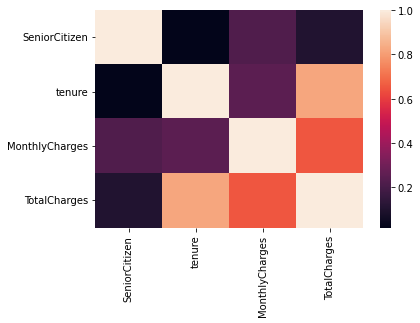

In [24]:
sns.heatmap(data.corr())

When looking at the correlations between the numeric features, realistically it seems that only TotalCharges and MonthlyCharges are correlated as it would only make sense since MonthlyCharges contribute the the size of TotalCharges

The objective is identify the variables affecting the rate of churn. When looking at the effects of churn, I will develop a general hypothesis. My hypothesis is that features such as the monthly charges, tenure, the type of service the subject is contracted are going to be important to the contributing to churn. So I will perform some EDA on those features. I will be performing the EDA on churned users and looking at the length of their tenure as if we compare active vs churned users, there could be active users who have just started their contract and could decide to drop their contract soon and therefore comparing the features against active vs churned users will give us a non-representative idea of the features.

In [ ]:
def is_normal(group):
    #Checks if an array of values is normally distributed using Shapiro-Wilkes Test
    #Null hypothesis is that data was sampled from normal distribution
    tstat, pval = stats.shapiro(group)
    if len(group) > 5000: #Test statistics more accurate for larger set
        if tstat < 0.05: 
            return False
    if pval < 0.05: 
        return False
    return True

def eq_var(group1, group2):
    #Check that property of homoscedacity (equal Variance) using Levene Test
    _, pval = stats.levene(group_1, group_2) 
    if pval < 0.05: return False
    return True

def stat_test(group1, group2):
    """Between 2 groups, if the conditions of normality + homoscendacity hold, perform 
    T-Test, otherwise perform the Mann Whiteny U Test."""
    
    if is_normal(group1) and is_normal(group2):
        if eq_var(group1, group2):
            print("Performing T-Test ...")
            return stats.ttest_ind(group1,group2)
        print("Performing T-Test with unequal variance")
        return stats.ttest_ind(group1,group2, equal_var = False)
    print("Performing U-Test ...")
    return mannwhitneyu(group1, group2)

In [33]:
churned_users = data[data["Churn"] == "No"]
active_users = data[data.Churn == "Yes"]

In [1]:
px.box(churned_users, x = "MonthlyCharges", y = "tenure")

NameError: name 'px' is not defined